In [18]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from text_recognizer.datasets import EmnistDataset

In [35]:
dataset = EmnistDataset(train=False, sample_to_balance=True)

In [36]:
dataset.load_or_generate_data()

In [37]:
from torch.utils.data import random_split, DataLoader

In [38]:
d1, d2 = random_split(dataset, [len(dataset)-10, 10])

In [39]:
len(d1)

55898

In [40]:
dl = DataLoader(d1, batch_size=16)

In [41]:
len(dl)

3494

In [42]:
d1.dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   4,   4,   4,   4,   4,   2,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   2,   4,   9,  32,  37,  37,  37,  32,  20,   1,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,  65, 109, 140, 204, 215, 217, 217, 201, 154,  22,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [43]:
type(dataset.data)

torch.Tensor

In [44]:
print(dataset)

EMNIST Dataset
Num classes: 80
Input shape: [28, 28]
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}



In [45]:
def display_images(dataset, shift=0):
    fig = plt.figure(figsize=(9, 9))
    for i in range(9):
        x, y = dataset[i + shift]
        ax = fig.add_subplot(3, 3, i + 1)
        x = x.squeeze(0).numpy()
        ax.imshow(x, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(dataset.mapper(int(y)))

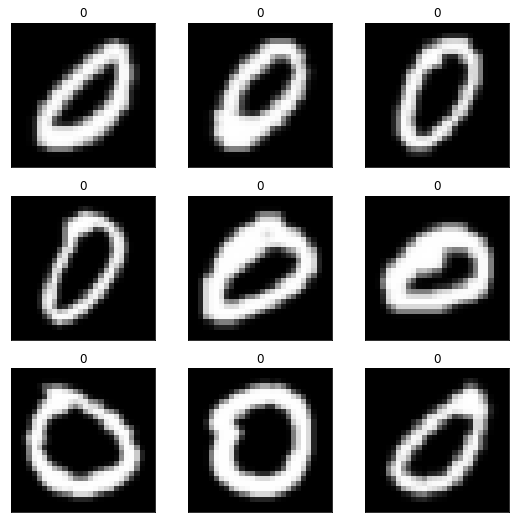

In [46]:
display_images(dataset)

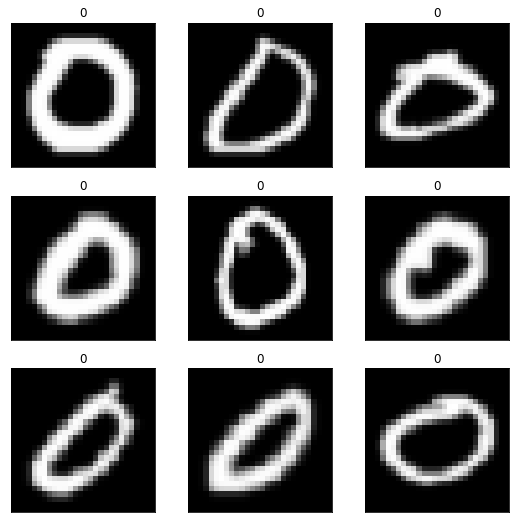

In [47]:
display_images(dataset, 9)